# Исследование объявлений о продаже квартир

На основании имеющегося архива объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах за несколько лет необходимо установить параметры, которые позволят определять рыночную стоимость объектов недвижимости. Результаты анализа в дальнейшем будут использованы сервисом при построении автоматизированной системы, отслеживающей аномалии и мошенническую деятельность.

### Библиотеки и модули

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random

### Содержание

1. Изучение общей информации о данных
2. Предобработка данных
    - Работа с пропусками
    - Изменение типов данных
    - Поиск дубликатов
3. Создание признаков
    - Цена квадратного метра
    - День недели, месяц и год публикации объявления
    - Этаж квартиры
    - Соотношение жилой и общей площади, а также отношение площади кухни к общей
4. Исследовательский анализ данных
    - Площадь, цена, число комнат, высота потолков
    - Время продажи квартиры
    - Удаление лишних значений
    - Факторы, влияющие на стоимость квартиры
5. Общий вывод

## Изучение общей информации о данных

Познакомимся с данными. Наже представлено описание данных:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м);
- balcony — число балконов;
- ceiling_height — высота потолков (м);
- cityCenters_nearest — расстояние до центра города (м);
- days_exposition — сколько дней было размещено объявление (от публикации до снятия);
- first_day_exposition — дата публикации;
- floor — этаж;
- floors_total — всего этажей в доме;
- is_apartment — апартаменты (булев тип);
- kitchen_area — площадь кухни в квадратных метрах (м²);
- last_price — цена на момент снятия с публикации;
- living_area — жилая площадь в квадратных метрах(м²);
- locality_name — название населённого пункта;
- open_plan — свободная планировка (булев тип);
- parks_around3000 — число парков в радиусе 3 км;
- parks_nearest — расстояние до ближайшего парка (м);
- ponds_around3000 — число водоёмов в радиусе 3 км;
- ponds_nearest — расстояние до ближайшего водоёма (м);
- rooms — число комнат;
- studio — квартира-студия (булев тип);
- total_area — площадь квартиры в квадратных метрах (м²);
- total_images — число фотографий квартиры в объявлении.

In [5]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Переименуем столбцы: cityCenters_nearest, parks_around3000, ponds_around3000.

In [7]:
df.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3', 'ponds_around3000': 'ponds_around_3'}, inplace=True)
df.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'city_centers_nearest',
 'parks_around_3',
 'parks_nearest',
 'ponds_around_3',
 'ponds_nearest',
 'days_exposition']

#### Вывод

В таблице представлено 23699 единиц данных о недвижимости. Два столбца с булевым типом, 14 столбцов с типом float64, 3 столбца с числовым типом данных (int64) и 3 столбца объектного типа данных (object). Видим, что в столбцах (ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, park_nearest, ponds_nearest, days_exposition) пропущены значения.

## Предобработка данных

### Работа с пропусками

Выделяют три вида пропусков:
- MCAR - абсолютно случайные пропуски, вероятность появления которых одинакова для каждой записи набора данных.
- MAR - случайные пропуски, вероятность появления которых зависит от другой информации в данных.
- MNAR - неслучайные пропуски, вероятность появления которых зависит от другой информации в данных, при этом информация по этим атрибутам может отсутствовать, и значения собственного столбца.

#### Cтолбцы с числовым типом данных

In [8]:
df_num = df.select_dtypes(['int64', 'float64'])
df_num.head(5)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3,parks_nearest,ponds_around_3,ponds_nearest,days_exposition
0,20,13000000.0,108.0,3,2.70,16.0,51.0,8,25.0,NaN,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,1,NaN,11.0,18.6,1,11.0,2.0,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2,NaN,5.0,34.3,4,8.3,0.0,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,3,NaN,14.0,NaN,9,NaN,0.0,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2,3.03,14.0,32.0,13,41.0,NaN,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [82]:
df_num.isnull().sum()

total_images                0
last_price                  0
total_area                  0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
kitchen_area             2278
balcony                 11519
airports_nearest         5542
city_centers_nearest     5519
parks_around_3           5518
parks_nearest           15620
ponds_around_3           5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пойдем по порядку. Столбец ceiling_height (высота потолков) имеет 9125 пропущенных значений. Возможно причиной наличия пропусков в этом столбце может быть то, что человек просто поленился измерить высоту потолков, не заполнив данный параметр недвижимости. Отнесем этот пропуск к MCAR.

In [83]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Заполним пропуски в этом столбце Single Imputation методом - медианным значением, так в целом распределение высоты квартир находится в диапазоне от 2.5 до 3. Можно заметить также, что максимальным значением является 100 м.

In [84]:
pd.cut(df['ceiling_height'], [0, 2, 3, 10, 100]).value_counts()

(2, 3]       12961
(3, 10]       1504
(10, 100]       25
(0, 2]          14
Name: ceiling_height, dtype: int64

Видино, что в данных есть квартиры с высотой потолка менее 2 м. и более 10 м.. Это с трудом соотносится с реальностью. 

In [85]:
df['ceiling_height'].fillna(value=df['ceiling_height'].median(), inplace=True)
df['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Рассмотрим столбец floors_total. В нем 86 пропущенных значений, не так много. Возможно причиной данного пропуска может быть то, что человек живет попросту в одноэтажном доме в связи с этим он не стал указывать общее количество этажей в доме.

In [86]:
df.query('floors_total.isnull() == True and floor == 1')[['floors_total', 'floor']]

,floors_total,floor
237,NaN,1
3817,NaN,1
15989,NaN,1


Взаимосвязи между этими столбцами нет :( Значит, человек возможно поленился посчитать количество этажей в своем доме, не заполнив данный параметр :D

In [87]:
df['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Заполним пропуски случайными целыми значениями от 1 до 60. При этом общее количество этажей не может быть меньше, чем этаж в этом доме.

In [88]:
def random_total_floor(data):
    floor = data['floor']
    ran_floors_total = random.randint(floor, 60)
    return ran_floors_total

df.loc[df['floors_total'].isnull() == True, 'floors_total'] = df.apply(random_total_floor, axis=1)
df['floors_total'].describe()

count    23699.000000
mean        10.758386
std          6.784783
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Рассмотрим столбец living_area, а вместе с ним и kitchen_area. Площадь кухни не входит в жилую площадь. В одном случае пропущенных значений 1903, в другом - 2278. Скорее всего человек не знает ни той, ни другой площади, поэтому не заполнил эту информацию о квартире - это тип пропуска MNAR. Также есть случаи, когда человек знает одну из этих площадей, но информация о другой отсутствует - тип пропуска MAR. Возможно посчитал не нужным заполнять обе площади.

In [89]:
df.query('living_area.isnull() == True and kitchen_area.isnull() == True')[['living_area', 'kitchen_area']]

,living_area,kitchen_area
3,NaN,NaN
30,NaN,NaN
37,NaN,NaN
44,NaN,NaN
59,NaN,NaN
...,...,...
23632,NaN,NaN
23642,NaN,NaN
23663,NaN,NaN
23670,NaN,NaN


Видино, что пропуски между этими столбцами взаимосвязаны. Количество строк, в которых пропущено оба значения, равно 1464.

$total\_area = living\_area + kitchen\_area + extra\_area$

Отбросим компоненту $extra\_area$ в силу ее незначительности. И зная общую площадь квартиры, разобьем в определенном отношении площадь между кухней и жилой площадью.

In [90]:
"""
Функция, которая в определенной случайной пропорции делит площадь квартиры между жилой и кухней для случая,
когда в обоих столбцах пропущены значения. Когда же мы знаем одну из двух площадей, можем найти другую площадь.
"""

def liv_kit_area(row):
    total = row['total_area']
    liv = row['living_area']
    kit = row['kitchen_area']
    prop = [0.1, 0.2, 0.3]
    if liv != liv and kit != kit:
        prop_choice = random.choice(prop)
        row['living_area'] = (1 - prop_choice) * total
        row['kitchen_area'] = total - row['living_area']
    elif liv != liv and kit == kit:
        row['living_area'] = total - kit
    elif liv == liv and kit != kit:
        row['kitchen_area'] = total - liv
    return row

df = df.apply(liv_kit_area, axis=1)
print(df['living_area'].isnull().sum())
print(df['kitchen_area'].isnull().sum())

0
0


Рассмотрим столбец balcony. Как мы знаем, не во всех домах есть балконы. Скорее всего данные пропуски связаны с тем, что у человека в доме нет балкона - тип пропуска MNAR. Заменим пропуски нулем.

In [91]:
df['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [92]:
df.loc[df['balcony'].isnull() == True, 'balcony'] = 0
df['balcony'].isnull().sum()

0

Гипотеза: между столбцами city_centers_nearest, airports_nearest, parks_around_3, ponds_around_3 существует закономерность в пропусках.

In [93]:
df.query('city_centers_nearest.isnull() == True and airports_nearest.isnull() == True and parks_around_3.isnull() == True and ponds_around_3.isnull() == True').shape[0]

5518

Да, гипотеза верна, а именно что пропуски в данных столбцах между собой взаимосвязаны. Тип пропуска - MNAR. Поскольку данные столбцы заполнялись данными автоматически, то пропуски в них с высокой вероятностью связаны с техническими сбоем. Также возможно, что на карте не удалось определить координаты месторасположения этих домов, поэтому не удалось провести расчет данных параметров.

Игнорирование пропусков усложит обработку данных. Удаление данных приведет к большой доли потери от всего количества (около 20%). Заполним медианными значениями пропуски в этих столбцах.

In [94]:
for i in ['city_centers_nearest', 'airports_nearest', 'parks_around_3', 'ponds_around_3']:
    if i in ['city_centers_nearest', 'airports_nearest']:
        df.loc[df[i].isnull() == True, i] = df[i].median()
    else:
        df.loc[df[i].isnull() == True, i] = df[i].mode()[0]

In [95]:
df.query('city_centers_nearest.isnull() == True and airports_nearest.isnull() == True and parks_around_3.isnull() == True and ponds_around_3.isnull() == True').shape[0]

0

Рассмотрим столбцы parks_nearest и ponds_nearest. Есть ли взаимосвязь между пропусками?

In [96]:
df.query('parks_nearest.isnull() == True and ponds_nearest.isnull() == True').shape[0]

11334

Аналогичная ситуация как и выше!

In [97]:
for i in ['parks_nearest', 'ponds_nearest']:
    df.loc[df[i].isnull() == True, i] = df[i].median()

In [98]:
df.query('parks_nearest.isnull() == True and ponds_nearest.isnull() == True').shape[0]

0

Рассмотрим столбец days_exposition.

In [99]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [100]:
pd.set_option('display.max_columns', None)
df.query('days_exposition.isnull() == True').head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3,parks_nearest,ponds_around_3,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24.0,52.7,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,455.0,0.0,502.0,NaN
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,32.0,3,NaN,False,False,8.0,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,NaN,False,False,7.0,0.0,Санкт-Петербург,30011.0,12872.0,0.0,455.0,0.0,502.0,NaN
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,NaN,False,False,8.3,2.0,Санкт-Петербург,15114.0,12702.0,0.0,455.0,0.0,502.0,NaN


Заполним случайными значениями от 45 до 232.

In [101]:
def ran_days_exp(row):
    ran_days = random.randint(45, 232)
    return ran_days

df.loc[df['days_exposition'].isnull() == True, 'days_exposition'] = df.apply(ran_days_exp, axis=1)
df['days_exposition'].describe()

count    23699.000000
mean       175.395924
std        205.875116
min          1.000000
25%         45.000000
50%        106.000000
75%        213.000000
max       1580.000000
Name: days_exposition, dtype: float64

Посмотрим все ли пропуски заполнены для данных числового типа:

In [102]:
df_num = df.select_dtypes(['int64', 'float64'])
df_num.isnull().sum()

total_images            0
last_price              0
total_area              0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
kitchen_area            0
balcony                 0
airports_nearest        0
city_centers_nearest    0
parks_around_3          0
parks_nearest           0
ponds_around_3          0
ponds_nearest           0
days_exposition         0
dtype: int64

#### Cтолбцы с булевым типом данных

In [103]:
df_bool = df.select_dtypes(['bool'])
df_bool.isnull().sum()

studio       0
open_plan    0
dtype: int64

Столбец is_apartment тоже относится к булевому типу данных, однако при загрузке таблицы ему присвоился тип object.

In [104]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Большое количество пропусков. Может быть люди не понимают разницу между апартаментами и жилыми домами, поэтому не стали заполнять данное поле. Возможно технический сбой при выгрузке данных. В целом жилых домов во много раз больше, чем апартаментов, поэтому, увеличив вероятность выпадения False, случайно распределим False и True между пропусками.

In [105]:
def ran_apart(row):
    list_0_1 = 9 * [0]
    list_0_1.append(1)
    ran_0_1 = random.choice(list_0_1)
    return ran_0_1

df.loc[df['is_apartment'].isnull() == True, 'is_apartment'] = df.apply(ran_apart, axis=1)

In [106]:
df['is_apartment'].value_counts()

0    21564
1     2135
Name: is_apartment, dtype: int64

#### Cтолбцы с объектным типом данных

In [107]:
df_obj = df.select_dtypes(['object'])
df_obj.isnull().sum()

first_day_exposition     0
is_apartment             0
locality_name           49
dtype: int64

Рассмотрим столбец locality_name. Пропусков мало. Возможно люди, заполняющие данные, забыли указать населенный пункт. Заполню модой.

In [108]:
df['locality_name'].value_counts()

Санкт-Петербург                 15721
посёлок Мурино                    522
посёлок Шушары                    440
Всеволожск                        398
Пушкин                            369
                                ...  
поселок Перово                      1
поселок Гаврилово                   1
поселок Дружноселье                 1
городской посёлок Свирьстрой        1
деревня Нижние Осельки              1
Name: locality_name, Length: 364, dtype: int64

In [109]:
df.loc[df['locality_name'].isnull() == True, 'locality_name'] = df['locality_name'].mode()[0]

In [110]:
df_obj = df.select_dtypes(['object'])
df_obj.isnull().sum()

first_day_exposition    0
is_apartment            0
locality_name           0
dtype: int64

### Изменение типов данных

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
city_centers_nearest    23699 non-null float64
parks_around_3          23699 non-null float64
parks_nearest           23699 non-null float64
ponds_around_

Ранее заметили, что столбец is_apartment должен быть в типе данных bool, когда на самом деле в типе object. Изменим.

In [112]:
df['is_apartment'] = df['is_apartment'].astype('bool')

Столбец first_day_exposition по сути должен быть в формате даты, а не объекта. Изменим.

In [113]:
df['first_day_exposition']

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23699, dtype: object

In [114]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Столбец floors_total содержит целочисленные значения по своей сути. Изменим.

In [115]:
df['floors_total'] = df['floors_total'].astype('int')

Столбцы balcony, parks_around_3, ponds_around_3, days_exposition хранят в себе целочисленные значения. Изменим.

In [116]:
int_columns = ['balcony', 'parks_around_3', 'ponds_around_3', 'days_exposition']
for i in int_columns:
    df[i] = df[i].astype('int')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
city_centers_nearest    23699 non-null float64
parks_around_3          23699 non-null int64
parks_nearest           23699 non-null float64
ponds_around_

#### Оптимизация данных

Проведем оптимизацию хранения данных с помощью изменения типов данных.

Оптимизация числовых типов:

In [118]:
"""
Функция для подсчета использования памяти каким-либо типом данных.
"""

def mem_usage(pd_obj):
    if isinstance(pd_obj, pd.DataFrame):
        usage_b = pd_obj.memory_usage(deep=True).sum()
    else:
        usage_b = pd_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2
    return "{:03.2f} MB".format(usage_mb)

In [119]:
df_int = df.select_dtypes(include=['int'])
converted_int = df_int.apply(pd.to_numeric, downcast='unsigned')

print(mem_usage(df_int))
print(mem_usage(converted_int))

1.45 MB
0.20 MB


In [120]:
df_float = df.select_dtypes(include=['float'])
converted_float = df_float.apply(pd.to_numeric, downcast='float')

print(mem_usage(df_float))
print(mem_usage(converted_float))

1.63 MB
0.81 MB


In [121]:
op_df = df.copy()
op_df[converted_int.columns] = converted_int
op_df[converted_float.columns] = converted_float

op_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null uint8
last_price              23699 non-null float32
total_area              23699 non-null float32
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null uint8
ceiling_height          23699 non-null float32
floors_total            23699 non-null uint8
living_area             23699 non-null float32
floor                   23699 non-null uint8
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float32
balcony                 23699 non-null uint8
locality_name           23699 non-null object
airports_nearest        23699 non-null float32
city_centers_nearest    23699 non-null float32
parks_around_3          23699 non-null uint8
parks_nearest           23699 non-null float32
ponds_around_

In [122]:
print(mem_usage(df))
print(mem_usage(op_df))

6.78 MB
4.72 MB


In [123]:
op_df['locality_name'] = op_df['locality_name'].astype('category')
print(mem_usage(df))
print(mem_usage(op_df))

7.43 MB
1.37 MB


Более чем на 80% удалось снизить потребление памяти.

In [124]:
op_df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3,parks_nearest,ponds_around_3,ponds_nearest,days_exposition
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,146
1,7,3350000.0,40.400002,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0,455.0,0,502.0,81
2,10,5196000.0,56.000000,2015-08-20,2,2.65,5,34.299999,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000.0,159.000000,2015-07-24,3,2.65,14,127.199997,9,False,False,False,31.799999,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121


### Поиск дубликатов

In [125]:
op_df.duplicated().sum()

0

In [126]:
op_df['locality_name'].duplicated().sum()

23335

In [127]:
from collections import Counter
len(Counter(op_df['locality_name'].tolist()))

364

Дубликатов нет.

## Создание признаков

### Цена квадратного метра

Расчет цены квадратного метра следующий: $\frac{last\_price}{total\_area}$

In [128]:
op_df['price_area'] = op_df['last_price'] / op_df['total_area']
op_df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3,parks_nearest,ponds_around_3,ponds_nearest,days_exposition,price_area
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,146,120370.367188
1,7,3350000.0,40.400002,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0,455.0,0,502.0,81,82920.789062
2,10,5196000.0,56.000000,2015-08-20,2,2.65,5,34.299999,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.710938
3,0,64900000.0,159.000000,2015-07-24,3,2.65,14,127.199997,9,False,False,False,31.799999,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.093750
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000


### День недели, месяц и год публикации объявления

In [129]:
op_df['day'] = pd.DatetimeIndex(op_df['first_day_exposition']).weekday
op_df['month'] = pd.DatetimeIndex(op_df['first_day_exposition']).month
op_df['year'] = pd.DatetimeIndex(op_df['first_day_exposition']).year

op_df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3,parks_nearest,ponds_around_3,ponds_nearest,days_exposition,price_area,day,month,year
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,146,120370.367188,3,3,2019
1,7,3350000.0,40.400002,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0,455.0,0,502.0,81,82920.789062,1,12,2018
2,10,5196000.0,56.000000,2015-08-20,2,2.65,5,34.299999,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.710938,3,8,2015
3,0,64900000.0,159.000000,2015-07-24,3,2.65,14,127.199997,9,False,False,False,31.799999,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.093750,4,7,2015
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,1,6,2018


### Этаж квартиры

In [130]:
def cat_floor(row):
    last_floor = row['floors_total']
    if row['floor'] == last_floor:
        return 'поcледний'
    elif row['floor'] == 1:
        return 'первый'
    else:
        return 'другой'

op_df['category_floor'] = op_df.apply(cat_floor, axis=1)

### Соотношение жилой и общей площади, а также отношение площади кухни к общей

In [131]:
op_df['liv_total'] = op_df['living_area'] / op_df['total_area']
op_df['kit_total'] = op_df['kitchen_area'] / op_df['total_area']

In [132]:
op_df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3,parks_nearest,ponds_around_3,ponds_nearest,days_exposition,price_area,day,month,year,category_floor,liv_total,kit_total
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,146,120370.367188,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.400002,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0,455.0,0,502.0,81,82920.789062,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.000000,2015-08-20,2,2.65,5,34.299999,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.710938,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.000000,2015-07-24,3,2.65,14,127.199997,9,False,False,False,31.799999,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.093750,4,7,2015,другой,0.800000,0.200000
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000


## Исследовательский анализ данных

### Площадь, цена, число комнат, высота потолков

In [137]:
def auto_graph(params, df):
    for param in params:
        q_1 = df[param].describe().tolist()[3]
        q_3 = df[param].describe().tolist()[5]
        iqr = df[param].median()
        df[param].plot(kind='hist', bins=40, range=(q_1 - 3 * iqr, q_3 + 3 * iqr), title=param, grid=True)
        plt.show()

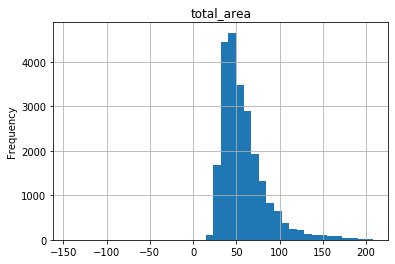

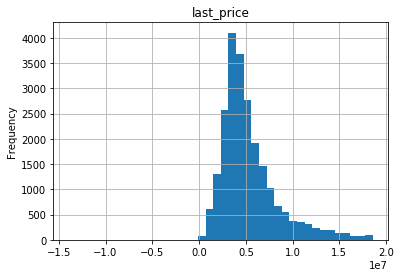

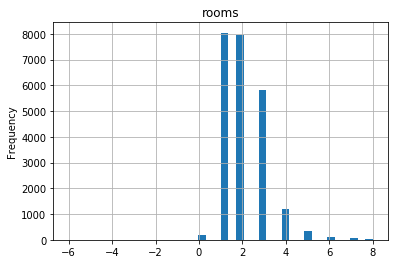

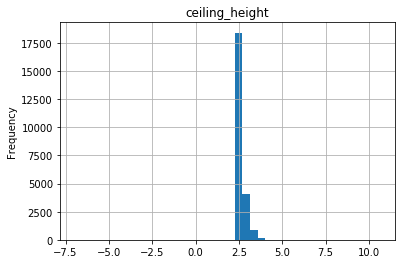

In [138]:
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']
auto_graph(columns, op_df)

- Гистограмма total_area напоминает нормальное распределение с длинным хвостом справа. Больше всего предлагают недвижимость с площадью в диапазоне от 25 до 100 кв. м.;
- Из не понятного масштаба гистограммы last_price сложно сделать какие-либо выводы;
- Гистограмма rooms чем-то напоминает нормальное распределение. Присутствует также длинный хвост справа. Большинство квартир имеют 1, 2, 3 комнат;
- По гистограмме ceiling_height получаем, что большинство квартир имеют высоту потолка в диапазоне от 2 до 3 метров. Длинный хвост справа.

### Время продажи квартиры

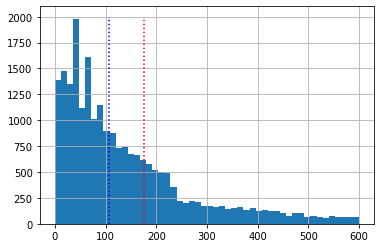

In [139]:
mean_d_exp = op_df['days_exposition'].mean()
median_d_exp = op_df['days_exposition'].median()

ax = df['days_exposition'].hist(bins=50, range=(0, 600))
ax.vlines(mean_d_exp, 0, 2000, color='r', linestyle=':')
ax.vlines(median_d_exp, 0, 2000, color='b', linestyle=':')
plt.show()

График напоминает пуассоновское распределение. По данной гистограмме видно, что хвост начинается примерно с 250 дня, так как после этого значения резко меняется темп убывания графика. Следует вывод, что можно считать продажу особо длительной, начиная с 250 дня продаж. Особо быстрой можно считать продажу до 50 дней, так как при этом значении распределение достигает максимума. Обычно продажа знанимает до 100-200 дней.

In [140]:
print(f'Среднее значение: {mean_d_exp}')
print(f'Медианное значение: {median_d_exp}')

Среднее значение: 175.39592387864468
Медианное значение: 106.0


### Удаление лишних значений

Построим для каждого параметра диграмму с размахом (ящик с усами).

In [141]:
op_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23699 non-null uint8
last_price              23699 non-null float32
total_area              23699 non-null float32
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null uint8
ceiling_height          23699 non-null float32
floors_total            23699 non-null uint8
living_area             23699 non-null float32
floor                   23699 non-null uint8
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float32
balcony                 23699 non-null uint8
locality_name           23699 non-null category
airports_nearest        23699 non-null float32
city_centers_nearest    23699 non-null float32
parks_around_3          23699 non-null uint8
parks_nearest           23699 non-null float32
ponds_aroun

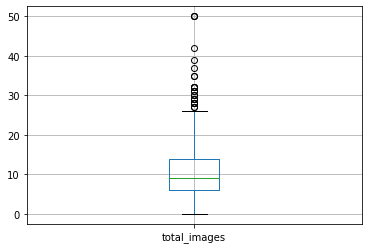

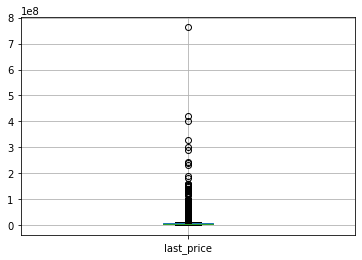

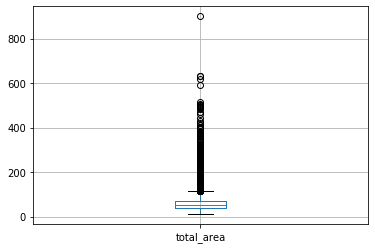

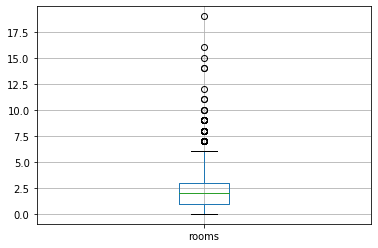

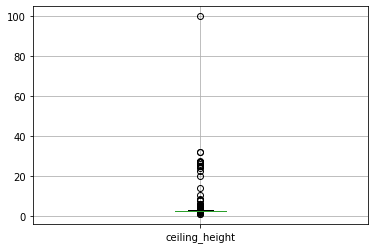

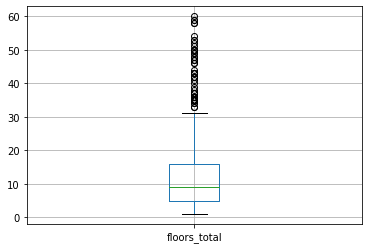

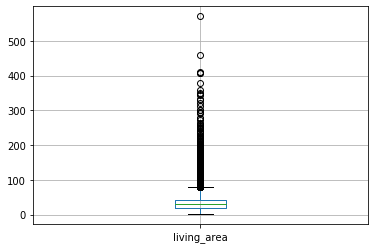

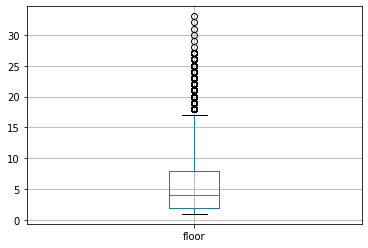

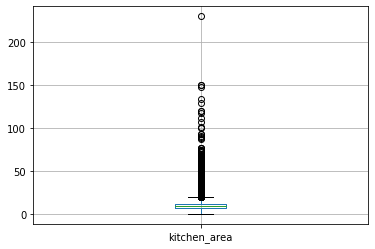

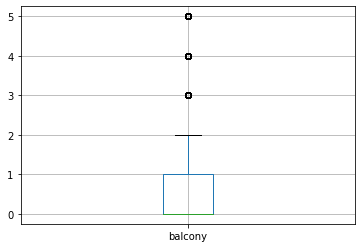

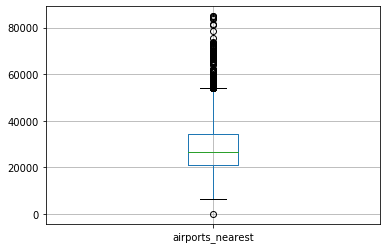

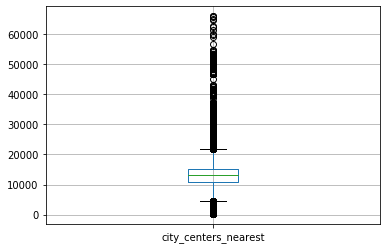

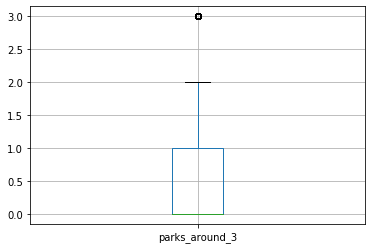

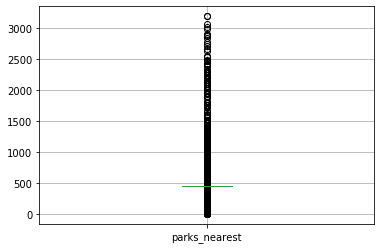

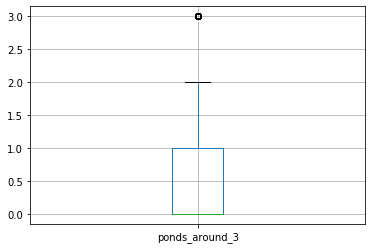

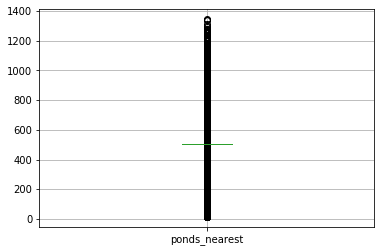

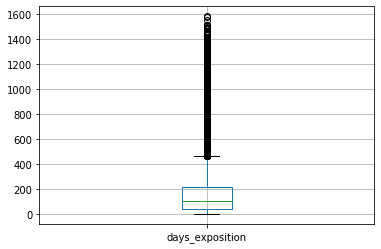

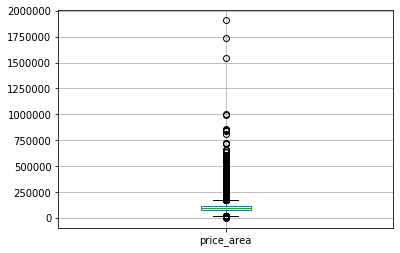

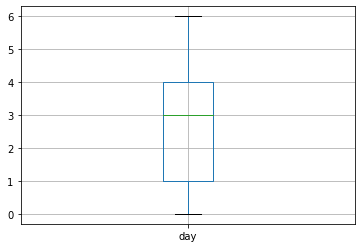

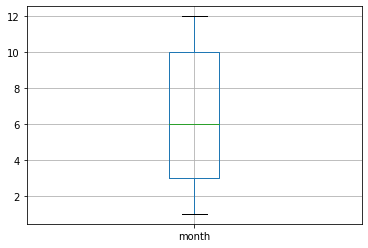

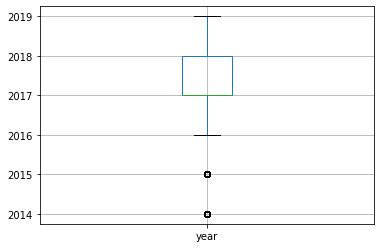

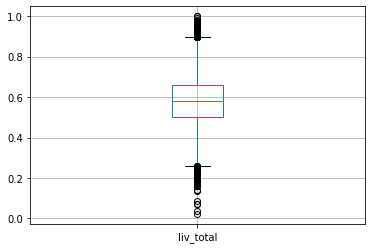

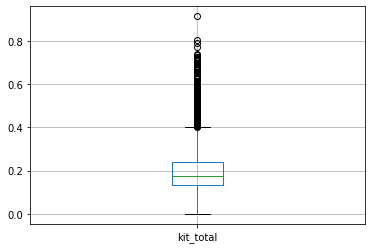

In [142]:
"""
Автоматизирую построение ящиков с усами для дальнейшего их анализа.
"""

op_df_num = op_df.select_dtypes(['float32', 'uint8', 'uint16', 'int64'])
columns = op_df_num.columns.tolist()

for column in columns:
    op_df.boxplot(column=[column])
    plt.show()

#### last_price

In [143]:
op_df['last_price'].describe()

count        23699.0
mean       6541548.5
std       10887013.0
min          12190.0
25%        3400000.0
50%        4650000.0
75%        6800000.0
max      763000000.0
Name: last_price, dtype: float64

In [144]:
pd.cut(op_df['last_price'], [0, 1000000, 10000000, 100000000, 1000000000]).value_counts()

(1000000, 10000000]        20733
(10000000, 100000000]       2684
(0, 1000000]                 245
(100000000, 1000000000]       37
Name: last_price, dtype: int64

Видим, что есть выбивающиеся значения, которые меньше 1 млн. Это очень низкие цены на недвижимость, поэтому скорее всего этого выбросы, чем редкие значения. Редкими значениями в данном случае, на мой взгляд, здесь будут квартиры, стоимость которых болеее 100 млн. Удалим недвжимость стоимость менее 1 млн. и более 100 млн - это составит 1-2% от общего числа данных.

In [145]:
op_df.drop(op_df.query('last_price <= 1000000').index, inplace=True)
op_df.drop(op_df.query('last_price >= 100000000').index, inplace=True)

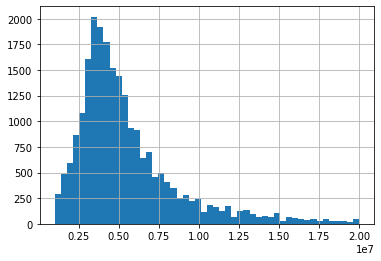

In [146]:
op_df['last_price'].hist(bins=50, range=(1000000, 20000000))

#### total_area

Видим, что есть выбросы в площади, особенно заметно квартиру с площадь более 800 кв. м. Редкими значениями в целом являются квартиры с площадью более 500 кв. м. и менее 10 кв. м.

In [147]:
op_df['total_area'].describe()

count    23417.000000
mean        60.118435
std         33.571873
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        590.000000
Name: total_area, dtype: float64

In [148]:
pd.cut(op_df['total_area'], [0, 10, 20, 100, 500, 900]).value_counts()

(20, 100]     21586
(100, 500]     1795
(10, 20]         33
(500, 900]        3
(0, 10]           0
Name: total_area, dtype: int64

In [149]:
op_df.drop(op_df.query('total_area > 500').index, inplace=True)

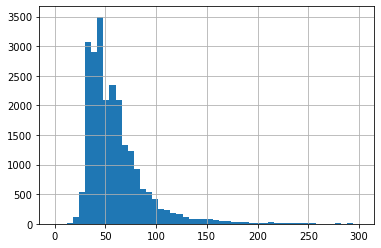

In [150]:
op_df['total_area'].hist(bins=50, range=(0, 300))

#### rooms

In [151]:
op_df['rooms'].describe()

count    23414.000000
mean         2.068848
std          1.067992
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [152]:
pd.cut(op_df['rooms'], [0, 1, 4, 10, 20]).value_counts()

(1, 4]      14787
(0, 1]       7936
(4, 10]       489
(10, 20]        6
Name: rooms, dtype: int64

С трудом представляется недвижимость, в которой будет более 10 комнта. Скорее это редкое явление. Хотя 8 уже много...

In [153]:
op_df.drop(op_df.query('rooms > 10').index, inplace=True)

In [154]:
op_df.query('rooms == 0')['total_area'].median()

26.075

Также есть квартиры, в которых указано 0 комнат. Сверху получаем, что это в основном недвижимость, медианное значение которого составляет примерно 26 кв. м. - это площадь студии, однокомнатной квартиры, апартаментов с одной комнатой. Заменим 0 на 1.

In [155]:
op_df['rooms'] = op_df['rooms'].where(op_df['rooms'] != 0, 1)

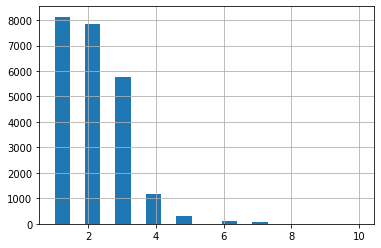

In [156]:
op_df['rooms'].hist(bins=20)

#### ceiling_height

In [157]:
op_df['ceiling_height'].describe()

count    23408.000000
mean         2.724126
std          0.993281
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [158]:
pd.cut(df['ceiling_height'], [1, 3, 10, 100]).value_counts()

(1, 3]       22169
(3, 10]       1504
(10, 100]       25
Name: ceiling_height, dtype: int64

Потолки высотой более 10 м.... что-то за рамками выходящего...

In [159]:
op_df.drop(op_df.query('ceiling_height > 10').index, inplace=True)

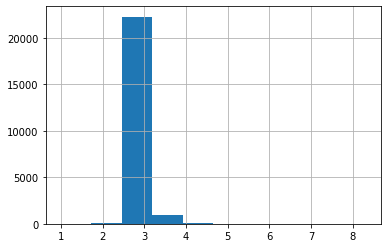

In [160]:
op_df['ceiling_height'].hist(bins=10)

#### floors_total

In [161]:
op_df['floors_total'].describe()

count    23383.000000
mean        10.837275
std          6.783464
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [162]:
pd.cut(op_df['floors_total'], [1, 5, 10, 20, 30, 40, 50, 60]).value_counts()

(1, 5]      7776
(5, 10]     6796
(10, 20]    6048
(20, 30]    2667
(30, 40]      41
(40, 50]      26
(50, 60]      10
Name: floors_total, dtype: int64

Питер невысокий город сам по себе, поэтому увидеть здания высотой более 50 этажностью почти невозможно...

In [163]:
op_df.drop(op_df.query('floors_total > 40').index, inplace=True)

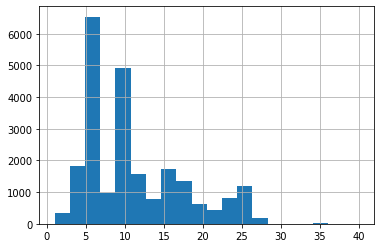

In [164]:
op_df['floors_total'].hist(bins=20)

#### living_area

In [165]:
op_df['living_area'].describe()

count    23347.000000
mean        35.531021
std         22.558811
min          2.000000
25%         19.000000
50%         30.799999
75%         43.200001
max        406.929993
Name: living_area, dtype: float64

In [166]:
pd.cut(op_df['living_area'], [2, 30, 50, 100, 200, 300, 500]).value_counts()

(2, 30]       11249
(30, 50]       8559
(50, 100]      3113
(100, 200]      391
(200, 300]       26
(300, 500]        7
Name: living_area, dtype: int64

Квартиры жилой площади более 200 кв. м. это очень редкое явление.

In [167]:
op_df.drop(op_df.query('living_area > 200').index, inplace=True)

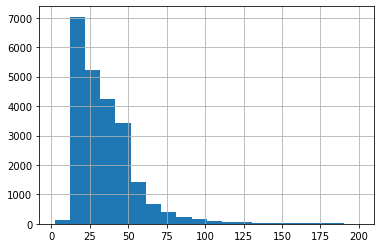

In [168]:
op_df['living_area'].hist(bins=20)

#### floor

Здесь стоит посмотреть на то, есть ли такие данные, где floor > floors_total?

In [169]:
op_df.query('floor > floors_total')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3,parks_nearest,ponds_around_3,ponds_nearest,days_exposition,price_area,day,month,year,category_floor,liv_total,kit_total


#### kitchen_area

In [170]:
op_df['kitchen_area'].describe()

count    23314.000000
mean        10.866043
std          6.469573
min          0.000000
25%          7.000000
50%          9.300000
75%         12.000000
max        134.000000
Name: kitchen_area, dtype: float64

In [171]:
pd.cut(op_df['kitchen_area'], [0, 2, 10, 20, 60, 100, 200]).value_counts()

(2, 10]       13705
(10, 20]       8159
(20, 60]       1398
(60, 100]        24
(0, 2]           20
(100, 200]        6
Name: kitchen_area, dtype: int64

Кухня площадью более 60 кв. м. очень редкое явление.

In [172]:
op_df.drop(op_df.query('living_area > 200').index, inplace=True)

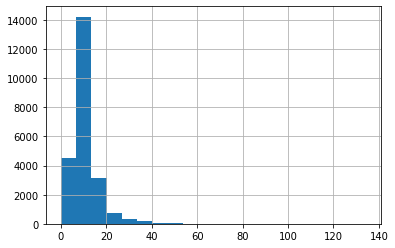

In [173]:
op_df['kitchen_area'].hist(bins=20)

#### days_exposition

In [174]:
op_df['days_exposition'].describe()

count    23314.000000
mean       175.319079
std        205.912203
min          1.000000
25%         45.000000
50%        105.000000
75%        213.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [175]:
pd.cut(op_df['days_exposition'], [1, 50, 100, 200, 500, 1000, 1200, 2000]).value_counts()

(1, 50]         6338
(100, 200]      5672
(50, 100]       4972
(200, 500]      4611
(500, 1000]     1448
(1000, 1200]     182
(1200, 2000]      90
Name: days_exposition, dtype: int64

Думаю, это нормально, что какая-то недвижимость продается 2 года, 3 года и более.

*Остальные параметры*

Следующие параметры: balcony, airports_nearest, city_centres_nearest, parks_around_3, parks_nearest, ponds_around_3, ponds_nearest, price_area, day, month, year, liv_total, kit_total. Они не требуют анализа, так как по графику ящика с ума видно, что особых выбросов они не содержат. Одни столбцы (airports_nearest, parks_nearest, ponds_nearest, city_centres_nearest) показывают киллометраж, который сложно оценить с точки зрения выброс это или нет. Также есть столбцы (balcony, parks_around_3, ponds_around_3), которые дают информации о кол-ве в диапозоне 0, 1, 2, 3, 4, 5. Другие столбцы (price_area, day, month, year, liv_total, kit_total) образованы с помощью других столбцов.

In [176]:
op_df.shape[0]

23314

Таким образом, удаляя выбросы и редкие значения, объем данных от изначального уровня уменьшился на 1.6%.

### Факторы, влияющие на стоимость квартиры

In [177]:
op_df.corr()['last_price'].sort_values(ascending=False)

last_price              1.000000
total_area              0.754895
price_area              0.732845
living_area             0.655200
kitchen_area            0.544086
rooms                   0.466208
ceiling_height          0.363159
ponds_around_3          0.281987
parks_around_3          0.277009
total_images            0.132135
days_exposition         0.098564
floor                   0.032868
balcony                 0.014028
parks_nearest           0.012540
month                   0.008276
liv_total               0.008053
is_apartment            0.005892
floors_total            0.003583
day                    -0.005276
airports_nearest       -0.013299
open_plan              -0.021516
studio                 -0.041101
year                   -0.053866
ponds_nearest          -0.086890
kit_total              -0.095067
city_centers_nearest   -0.270943
Name: last_price, dtype: float64

Получаем информацию, что цена на недвижимость зависит больше всего зависит от общей площади (75%) (цена на кв. м., жилая площадь и площадь кухни по сути тоже самое), количества комнат (47%), высоты потолков (36%), количества водоемов и парков в районе 3 км. (28%) и близости к центру (-27%). Корреляция с остальными параметрами незначитальная.

In [178]:
df_cat_floor_pivot = op_df.pivot_table(index='category_floor', values='last_price', aggfunc='median')
df_cat_floor_pivot

,last_price
category_floor,
другой,4850000.0
первый,3980000.0
поcледний,4350000.0


Получаем, что взаимосвязь между ценой и тем, на каком типе этажа находится дом есть. На первом этаже квартиры дешевле всего и дороже всего если они ни на первом, ни на последнем этаже.

     last_price
day            
0     4650000.0
1     4750000.0
2     4700000.0
3     4680000.0
4     4600000.0
5     4600000.0
6     4550000.0
       last_price
month            
1       4600000.0
2       4680000.0
3       4700000.0
4       4800000.0
5       4550000.0
6       4450000.0
7       4675000.0
8       4600000.0
9       4700000.0
10      4590000.0
11      4700000.0
12      4700000.0
      last_price
year            
2014   7640000.0
2015   5312500.0
2016   4550000.0
2017   4500000.0
2018   4600000.0
2019   5100000.0


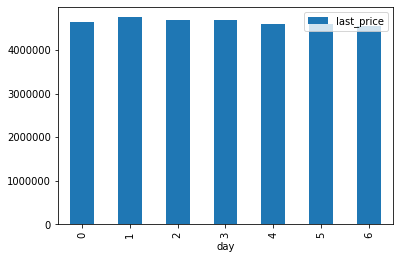

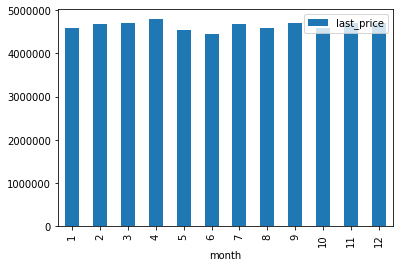

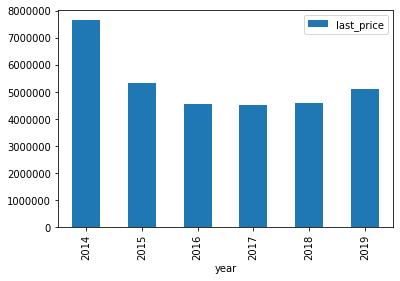

In [179]:
date = ['day', 'month', 'year']
for i in date:
    pivot_date_table = op_df.pivot_table(index=i, values='last_price', aggfunc='median')
    print(pivot_date_table)
    pivot_date_table.plot(kind='bar')

- дороже всего квартиры в понедельник, но от дня ко дню стоимость остается на уровне 4.5-4.6 млн. Какой день никак не влияет на стоимость квартиры;
- дешевле всего квартиры в июле, дороже всего в апреле. Но в общем целом уровень цен равен 4.6 млн.;
- по годам можно заметить, что квартиры в 2014 году стоили дороже всего. После стоимость квартир начала резко падать до 2017 года. Начиная с 2017 года, стоимость квартир немного подрасла.

#### Средняя цена квадртного метра в 10 населенных пункта с наибольшим числом объявлений

In [181]:
top_10_local = op_df['locality_name'].value_counts().sort_values(ascending=False).index.tolist()[:10]

In [182]:
op_df_top_10_local = op_df.query('locality_name in @top_10_local')
print(op_df_top_10_local['locality_name'].shape[0])
print(op_df.shape[0])

18876
23314


In [183]:
top_10_local_pivot = op_df_top_10_local.pivot_table(index='locality_name', aggfunc={'last_price': 'mean', 'total_area': 'mean'})
top_10_local_pivot['price_area'] = top_10_local_pivot['last_price'] / top_10_local_pivot['total_area']
top_10_local_pivot.sort_values(by='price_area', ascending=False)

,last_price,total_area,price_area
locality_name,,,
Санкт-Петербург,7521437.00,63.372929,118685.328125
Пушкин,6372484.50,60.703751,104976.781250
деревня Кудрово,4234158.00,46.571739,90916.898438
посёлок Парголово,4488075.00,51.521408,87110.875000
посёлок Мурино,3672258.00,44.160309,83157.437500
посёлок Шушары,4108081.75,53.821274,76328.210938
Колпино,3964021.50,53.231480,74467.617188
Гатчина,3496620.75,50.840263,68776.609375
Всеволожск,3796179.25,56.106625,67660.085938


Как и ожидалось в Санкт-Петербурге дороже всего стоит 1 кв. м - 118676. На втором месте - Пушкин - 104976, на третьем - деревня Кудрово - 90916.

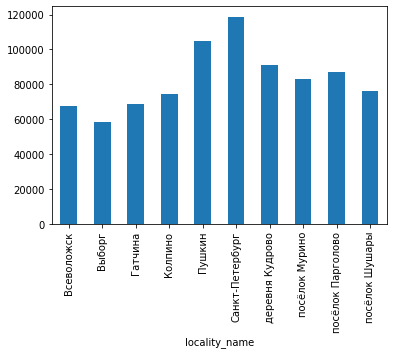

In [185]:
top_10_local_pivot['price_area'].plot(kind='bar')

In [186]:
med_price_by_local = op_df.groupby('locality_name').agg({'last_price': 'median'}).sort_values(by=('last_price'), ascending=False)
med_price_by_local.head(10) # вывод населенных пунктов с наибольшей стоимостью квартир

,last_price
locality_name,
деревня Бор,20295200.0
деревня Хязельки,11000000.0
посёлок Александровская,8725000.0
посёлок Репино,8083708.0
Санкт-Петербург,5500000.0
Сестрорецк,5450000.0
Пушкин,5165000.0
посёлок Лисий Нос,5027500.0
деревня Глинка,4750000.0


In [187]:
med_price_by_local.loc[med_price_by_local['last_price'] == med_price_by_local['last_price']].tail(10)
# вывод населенных пунктов с наименьшей стоимостью квартир

,last_price
locality_name,
посёлок Пансионат Зелёный Бор,1100000.0
деревня Пчева,1100000.0
деревня Котлы,1100000.0
посёлок Плоское,1100000.0
посёлок городского типа Важины,1100000.0
посёлок Сумино,1100000.0
поселок Каложицы,1090000.0
городской посёлок Лесогорский,1075000.0
деревня Раздолье,1050000.0


#### Квартиры в Санкт-Петербурге

In [188]:
df_spb = op_df.query('locality_name == "Санкт-Петербург"')
df_spb.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3,parks_nearest,ponds_around_3,ponds_nearest,days_exposition,price_area,day,month,year,category_floor,liv_total,kit_total
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,146,120370.367188,3,3,2019,другой,0.472222,0.231481
2,10,5196000.0,56.000000,2015-08-20,2,2.65,5,34.299999,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.710938,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.000000,2015-07-24,3,2.65,14,127.199997,9,False,False,False,31.799999,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.093750,4,7,2015,другой,0.800000,0.200000
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000
7,5,7915000.0,71.599998,2019-04-18,2,2.65,24,52.700001,22,False,False,False,18.900000,2,Санкт-Петербург,23982.0,11634.0,0,455.0,0,502.0,76,110544.695312,3,4,2019,другой,0.736034,0.263966


In [189]:
df_spb['center_km'] = round(df['city_centers_nearest'] /1000)
df_spb.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3,parks_nearest,ponds_around_3,ponds_nearest,days_exposition,price_area,day,month,year,category_floor,liv_total,kit_total,center_km
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,146,120370.367188,3,3,2019,другой,0.472222,0.231481,16.0
2,10,5196000.0,56.000000,2015-08-20,2,2.65,5,34.299999,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.710938,3,8,2015,другой,0.612500,0.148214,14.0
3,0,64900000.0,159.000000,2015-07-24,3,2.65,14,127.199997,9,False,False,False,31.799999,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.093750,4,7,2015,другой,0.800000,0.200000,7.0
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000,8.0
7,5,7915000.0,71.599998,2019-04-18,2,2.65,24,52.700001,22,False,False,False,18.900000,2,Санкт-Петербург,23982.0,11634.0,0,455.0,0,502.0,76,110544.695312,3,4,2019,другой,0.736034,0.263966,12.0


In [196]:
df_spb['price_for_km'] = df_spb['last_price'] / df_spb['center_km']
df_spb.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3,parks_nearest,ponds_around_3,ponds_nearest,days_exposition,price_area,day,month,year,category_floor,liv_total,kit_total,center_km,price_for_km
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,146,120370.367188,3,3,2019,другой,0.472222,0.231481,16.0,8.125000e+05
2,10,5196000.0,56.000000,2015-08-20,2,2.65,5,34.299999,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.710938,3,8,2015,другой,0.612500,0.148214,14.0,3.711429e+05
3,0,64900000.0,159.000000,2015-07-24,3,2.65,14,127.199997,9,False,False,False,31.799999,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.093750,4,7,2015,другой,0.800000,0.200000,7.0,9.271429e+06
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000,8.0,1.250000e+06
7,5,7915000.0,71.599998,2019-04-18,2,2.65,24,52.700001,22,False,False,False,18.900000,2,Санкт-Петербург,23982.0,11634.0,0,455.0,0,502.0,76,110544.695312,3,4,2019,другой,0.736034,0.263966,12.0,6.595833e+05


Резкий переход в падении цены начинается 9 км. от центра. Можно предположить, что центральная зона находится в радиусе 9 км от центра.

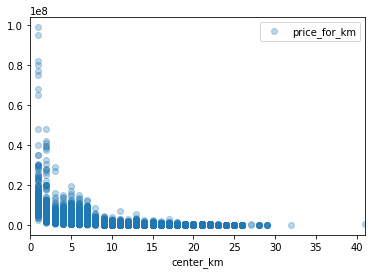

In [198]:
df_spb.plot(x='center_km', y='price_for_km', style='o', alpha=0.3)

#### Сегмент квартир в центре

In [201]:
df_center = df_spb.query('center_km < 9')
df_center.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3,parks_nearest,ponds_around_3,ponds_nearest,days_exposition,price_area,day,month,year,category_floor,liv_total,kit_total,center_km,price_for_km
3,0,64900000.0,159.000000,2015-07-24,3,2.65,14,127.199997,9,False,False,False,31.799999,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.093750,4,7,2015,другой,0.800000,0.200000,7.0,9.271429e+06
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000,8.0,1.250000e+06
24,8,6500000.0,97.199997,2015-10-31,2,2.65,3,46.500000,1,False,False,False,19.600000,0,Санкт-Петербург,20052.0,2336.0,3,411.0,3,124.0,265,66872.429688,5,10,2015,первый,0.478395,0.201646,2.0,3.250000e+06
35,6,15500000.0,149.000000,2017-06-26,5,2.65,5,104.000000,4,False,False,False,17.000000,0,Санкт-Петербург,23670.0,3502.0,0,455.0,1,779.0,644,104026.843750,0,6,2017,другой,0.697987,0.114094,4.0,3.875000e+06
51,7,45000000.0,161.000000,2017-10-17,3,3.20,8,38.000000,4,False,False,False,50.000000,0,Санкт-Петербург,32537.0,6589.0,0,455.0,3,99.0,541,279503.093750,1,10,2017,другой,0.236025,0.310559,7.0,6.428571e+06


In [202]:
df_center.corr()['last_price'].sort_values(ascending=False)

last_price              1.000000
price_area              0.731423
total_area              0.710702
price_for_km            0.673972
living_area             0.604545
kitchen_area            0.497231
rooms                   0.415272
ceiling_height          0.177013
parks_around_3          0.163007
total_images            0.138965
ponds_around_3          0.127674
floor                   0.116143
balcony                 0.083219
airports_nearest        0.081050
days_exposition         0.076570
floors_total            0.050362
is_apartment            0.023950
day                     0.010850
month                   0.005162
liv_total              -0.005066
open_plan              -0.007492
studio                 -0.042413
parks_nearest          -0.050838
year                   -0.064479
kit_total              -0.087408
center_km              -0.095270
city_centers_nearest   -0.099137
ponds_nearest          -0.104872
Name: last_price, dtype: float64

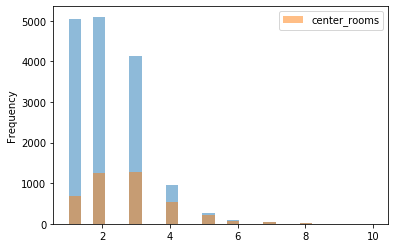

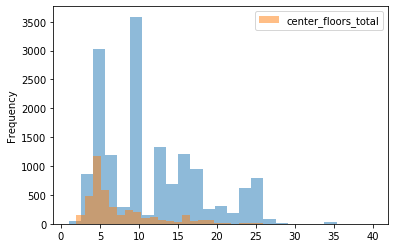

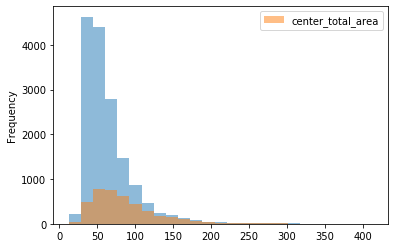

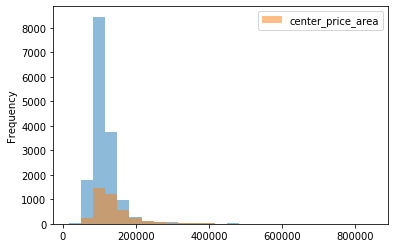

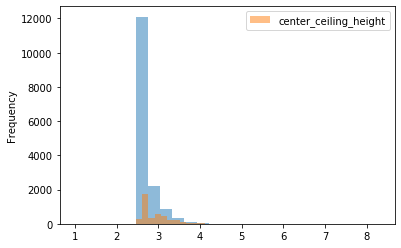

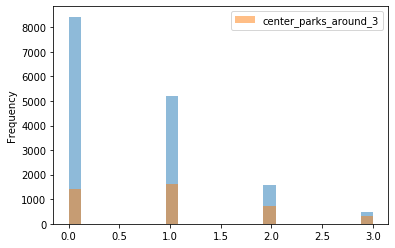

In [213]:
parameters = ['rooms', 'floors_total', 'total_area', 'price_area', 'ceiling_height', 'parks_around_3']

for param in parameters:
    ax = df_spb[param].plot(kind='hist', bins=25, alpha=0.5, label=f'city_{param}')
    df_center[param].plot(kind='hist', ax=ax, bins=25, alpha=0.5, label=f'center_{param}', legend=True)
    plt.show()

Цены в центре зависят от следующих параметров во многом таким образом (по корреляции):

- цена за кв. метр - 73%;
- жилая площадь - 60%;
- площадь кухни - 50%;
- кол-во комнат - 42%;
- высота потолков - 18%;
- кол-во парков в районе 3 км. - 16%.

Сравнивая город в целом и центр, можно сделать следующие выводы:

- в центре больше многоквартирных домов;
- в центре больше домов с очень маленьким кол-вом этажей;
- в центре больше домов с большой площадью квартиры;
- выше цены на квартиры;
- о высоте потолков ничего сказать нельзя;
- в центре больше квартир, в районе 3 км. которых есть есть более 1 парка.

## Общий вывод

Соотношение степени корреляций цены от параметров для центральных квартир и квартир в целом разное:

- и там, и там 73% зависимости от цены за кв. метр;
- выше корреляция от кол-ва комната в выборке в целом - 46% против 40%;
- выше корреляция от высоты потолков в квартире в выборке в целом - 36% против 17%.

В данной работе были сделаны следующие вещи: работка с пропусками, изменение типов данных, добавление новых столбцов информации, проанализированы зависимость цены от параметров в целом по всем данным, по городу, по центру, а также было сравнение параметров по центру и по городу.

- При работе с пропусками выявил, что есть как пропуски связанные с человечким фактором, так и техническим фактором. Измененил большое кол-во типов данных у параметром, а также провел оптимизацию памяти с помощью этого.

- Выявил, что больше всего на стоимость квартиры влият цена за кв. метр, кол-ва комнат, высоты потолков, сколько парков и водоемов находится в районе квартиры.

- Городом с самыми дорогими квартирами является Санкт-Петербург, на втором месте - Пушкин, на третьем - деревня Кудрово. Также эти города являются одними из тех, в которых было сделано наибольшее число объявлений.

- Парметры, влияющие на цену квартиры, что по всем данным, что по данным в центре, не изменились. Изменилась лишь корреляция между ними.

- Также было получено, что в центре больше располагется квартир с болшим кол-ом комнат, большой площадью квартир, с низким кол-ом этаже, высокими ценами, а также в центре больше квартир, рядом с которыми находится хотя бы один парк.